In [105]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [106]:
# Number of agents in the network
num_agents = 1000

# Probability of an agent adopting the new idea if they are connected to at least one adopter
p_adoption = 0

# Probability of an agent adopting the new idea if they are not connected to any adopters
p_adoption_isolated = 0

# Probability of an forgetting the new idea (connected)
p_forgetting = 0

# Probability of an forgetting the new idea (random)
p_forgetting_isolated = 0

# Maximum number of time steps in the simulation
max_timesteps = 1000

# Create the network
G = nx.erdos_renyi_graph(num_agents, 0.1)

# Assign a random initial state (adopted/not adopted) to each agent
states = np.random.choice([0, 1], num_agents)

# Assign a random level of influence to each agent
influence = np.random.uniform(0, 1, num_agents)

In [107]:
def update_states(G, states, influence, p_adoption, p_adoption_isolated, p_forgetting, p_forgetting_isolated):
    """
    Update the states of the agents based on the adoption rules.

    Parameters:
    - G: NetworkX graph representing the social network
    - states: NumPy array of integers (0/1) representing the current state (not adopted/adopted) of each agent
    - influence: NumPy array of floats representing the level of influence of each agent
    - p_adoption: Probability of an agent adopting the new idea if they are connected to at least one adopter
    - p_adoption_isolated: Probability of an agent adopting the new idea if they are not connected to any adopters
    - p_forgetting: Probability of an forgetting the new idea (connected)
    - p_adoption_isolated: Probability of an forgetting the new idea (random)

    Returns:
    - updated_states: NumPy array of integers (0/1) representing the updated state of each agent
    """
    updated_states = states.copy()
    for i in range(len(states)):
        # Check if the agent is connected to any adopters
        neighbors = [n for n in G.neighbors(i) if states[n] == 1]
        num_adopters = len(neighbors)
        # If the agent is already an adopter
        if states[i] == 1:
            # Roll the dice to see if the agent will forget
            if num_adopters > 0:
                forget_prob = p_forgetting
            else:
                forget_prob = p_forgetting_isolated
            if np.random.uniform() < forget_prob:
                updated_states[i] = 0
        else:
            # Roll the dice to see if the agent will adopt
            if num_adopters > 0:
                adopt_prob = p_adoption
            else:
                adopt_prob = p_adoption_isolated
            if np.random.uniform() < adopt_prob:
                updated_states[i] = 1
    return updated_states

In [108]:
f = plt.figure()
f.set_figwidth(20)

<Figure size 2000x480 with 0 Axes>

In [109]:
def simulation(G, states, influence, p_adoption, p_adoption_isolated, p_forgetting, p_forgetting_isolated, title):
    # Initialize the list to store the number of adopters at each time step
    adopters = []
    # Run the simulation
    for t in range(max_timesteps):
        states = update_states(G, states, influence,
                               p_adoption, p_adoption_isolated, p_forgetting, p_forgetting_isolated)
        adopters.append(np.sum(states))
    # Plot the results
    f = plt.figure()
    f.set_figwidth(40)
    plt.plot(adopters)
    plt.title(title)
    plt.xlabel('Time step')
    plt.ylabel('Number of adopters')
    plt.show()
    return adopters


In [110]:
simulations = [{
        'p_adoption': 0.2,
        'p_adoption_isolated': 0.01,
        'p_forgetting': 0,
        'p_forgetting_isolated': 0
    },
    {
        'p_adoption': 0,
        'p_adoption_isolated': 0,
        'p_forgetting': 0.1,
        'p_forgetting_isolated': 0.01
    },
    {
        'p_adoption': 0.5,
        'p_adoption_isolated': 0.5,
        'p_forgetting': 0.5,
        'p_forgetting_isolated': 0.5
    },
    {
        'p_adoption': 0.5,
        'p_adoption_isolated': 0.05,
        'p_forgetting': 0.5,
        'p_forgetting_isolated': 0.05
    },
    {
        'p_adoption': 0.6,
        'p_adoption_isolated': 0.03,
        'p_forgetting': 0.7,
        'p_forgetting_isolated': 0.02
}]


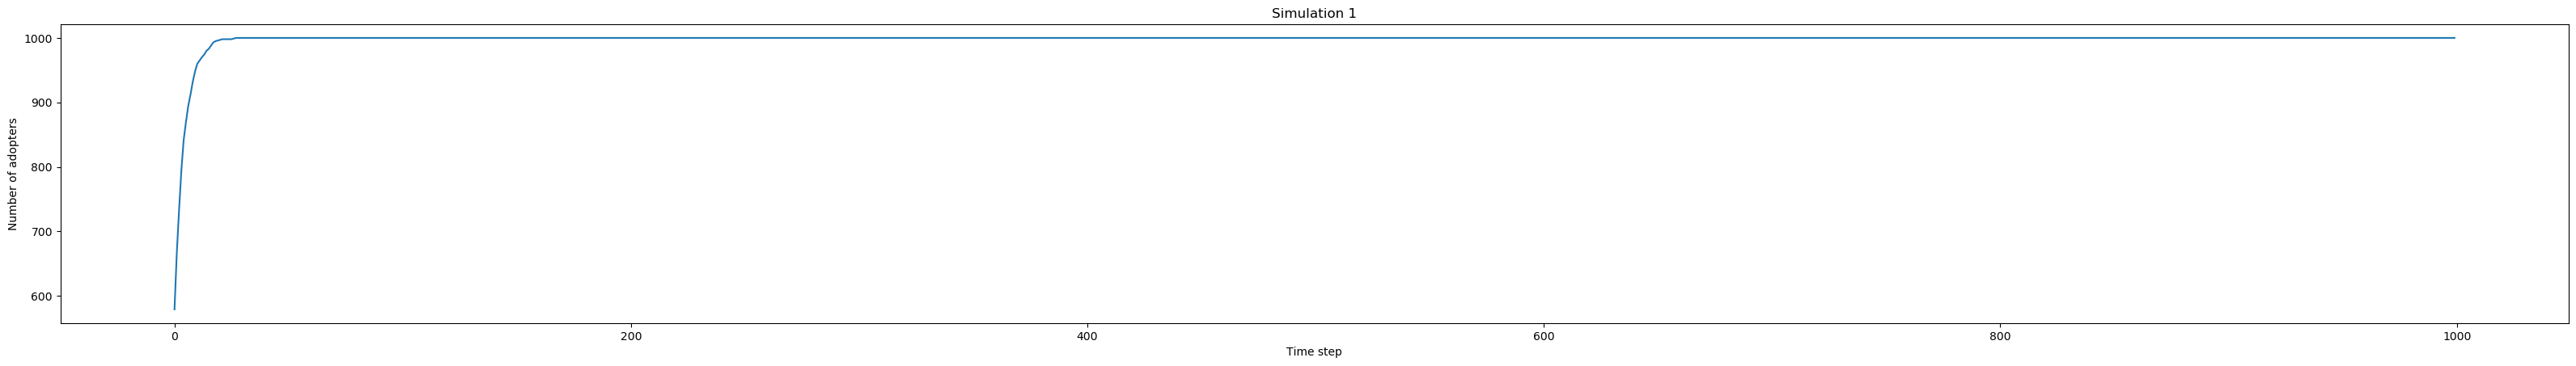

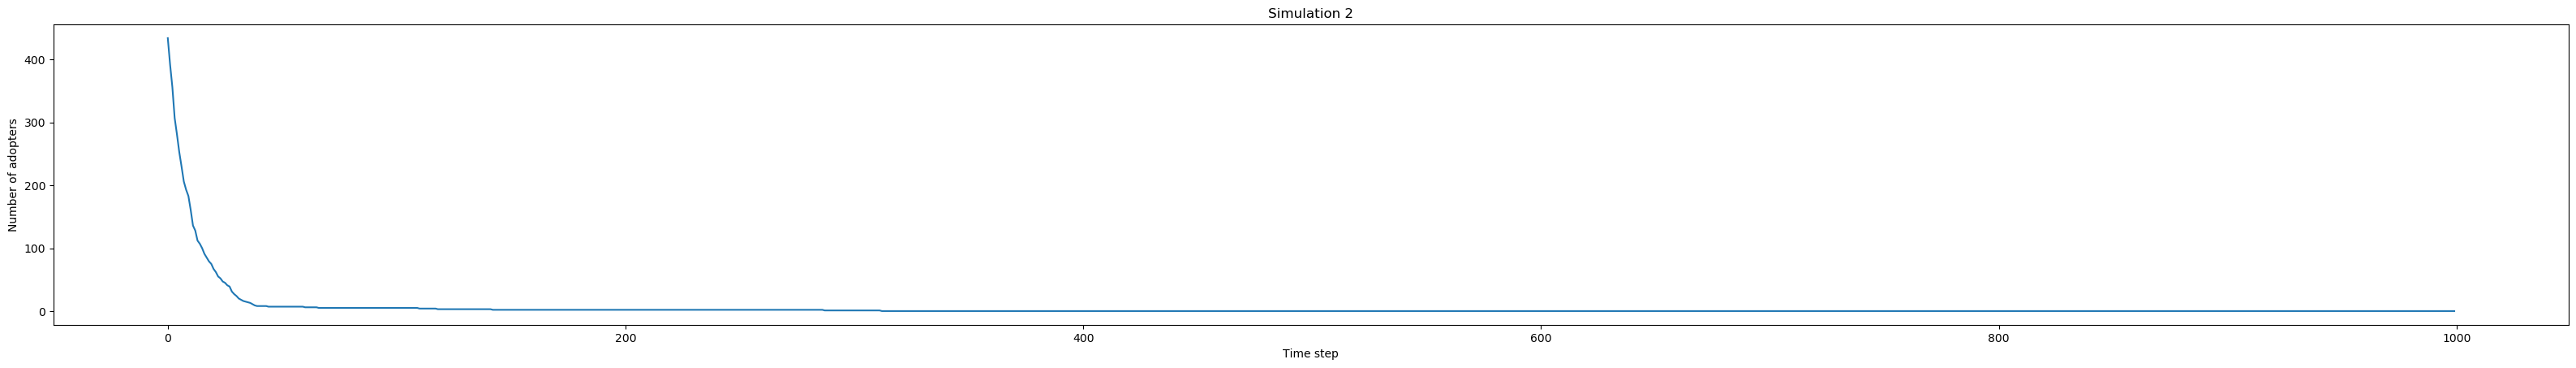

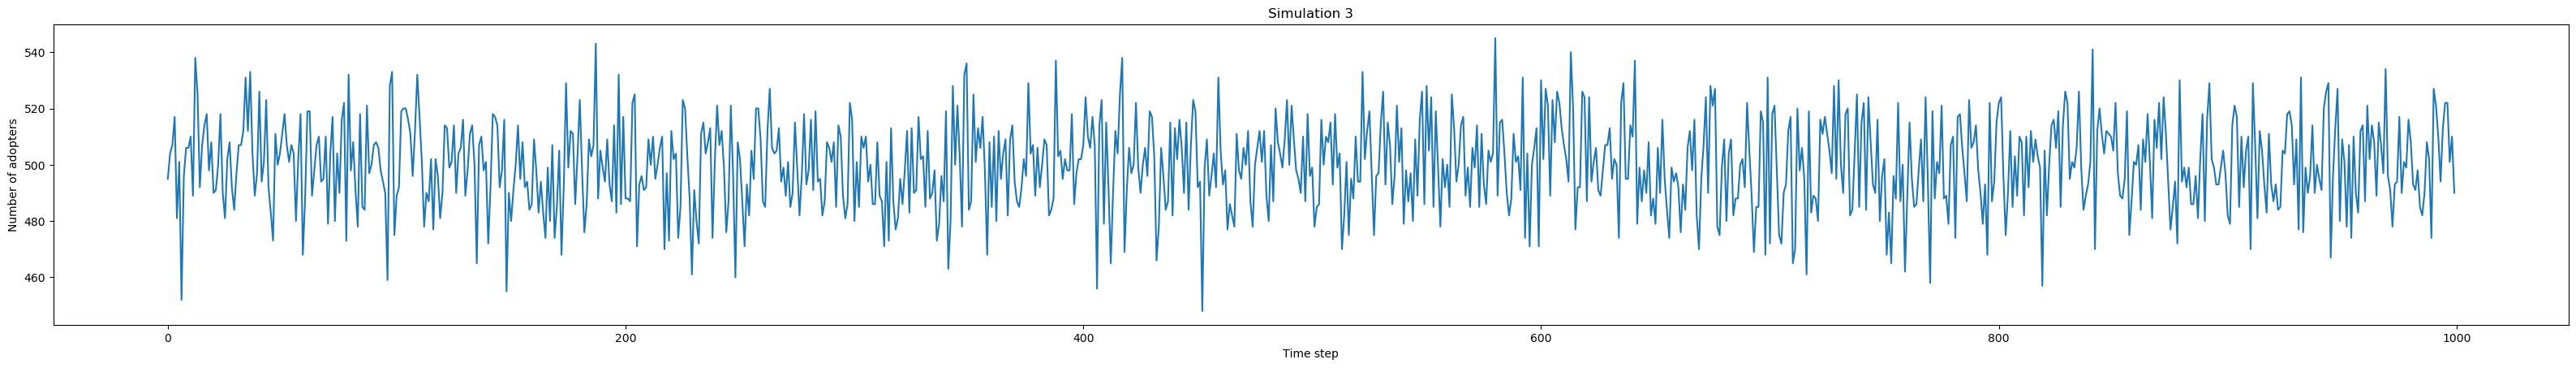

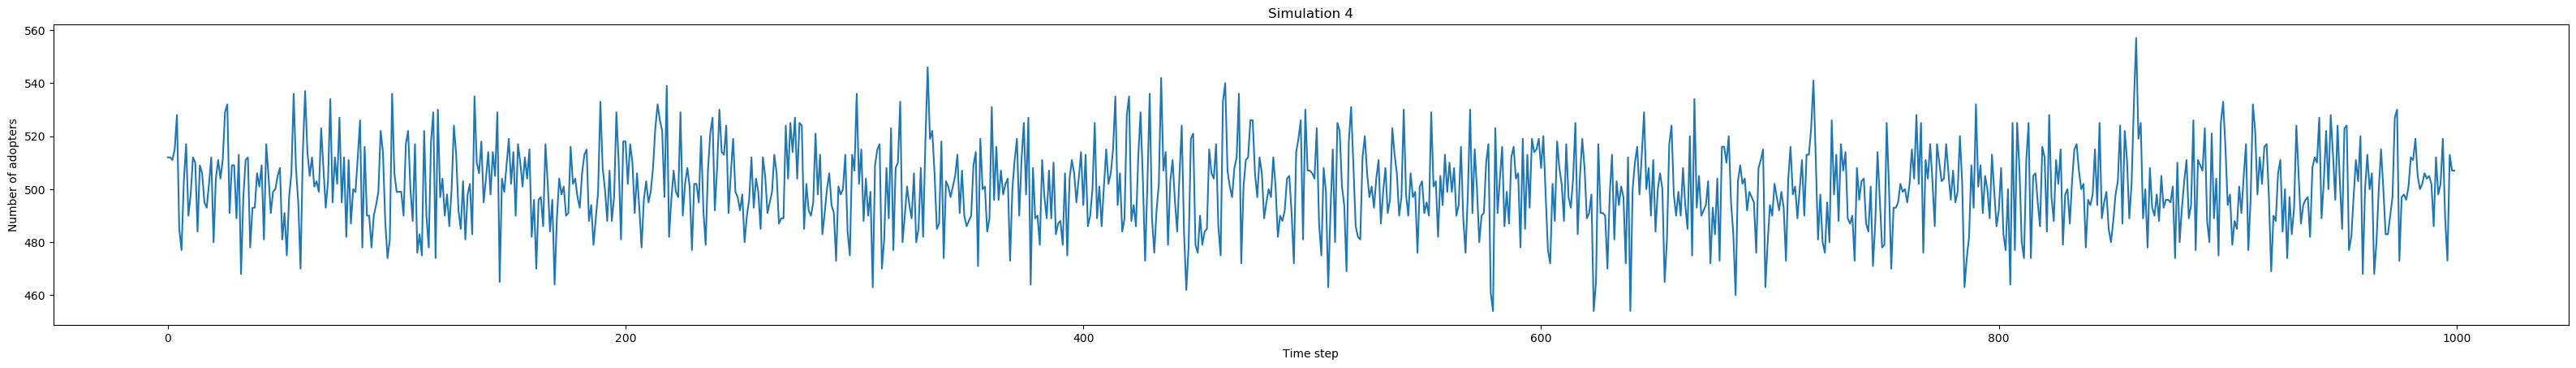

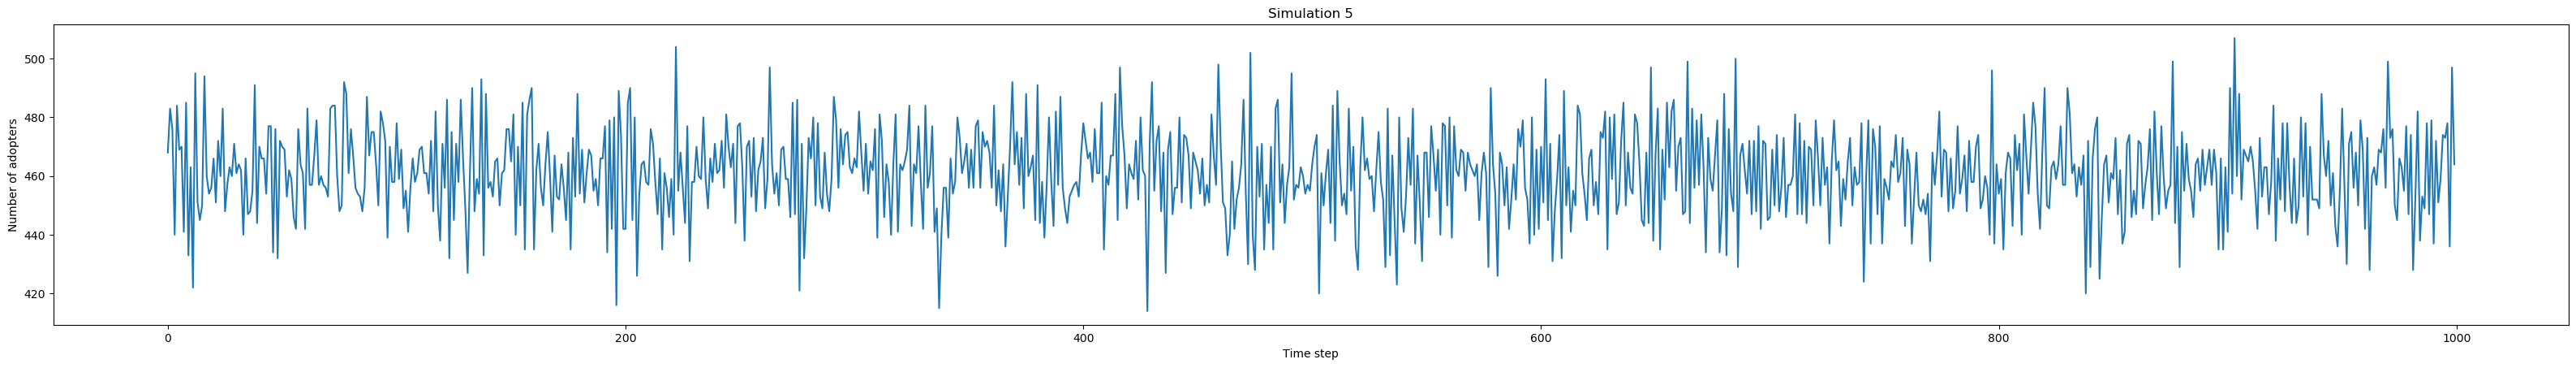

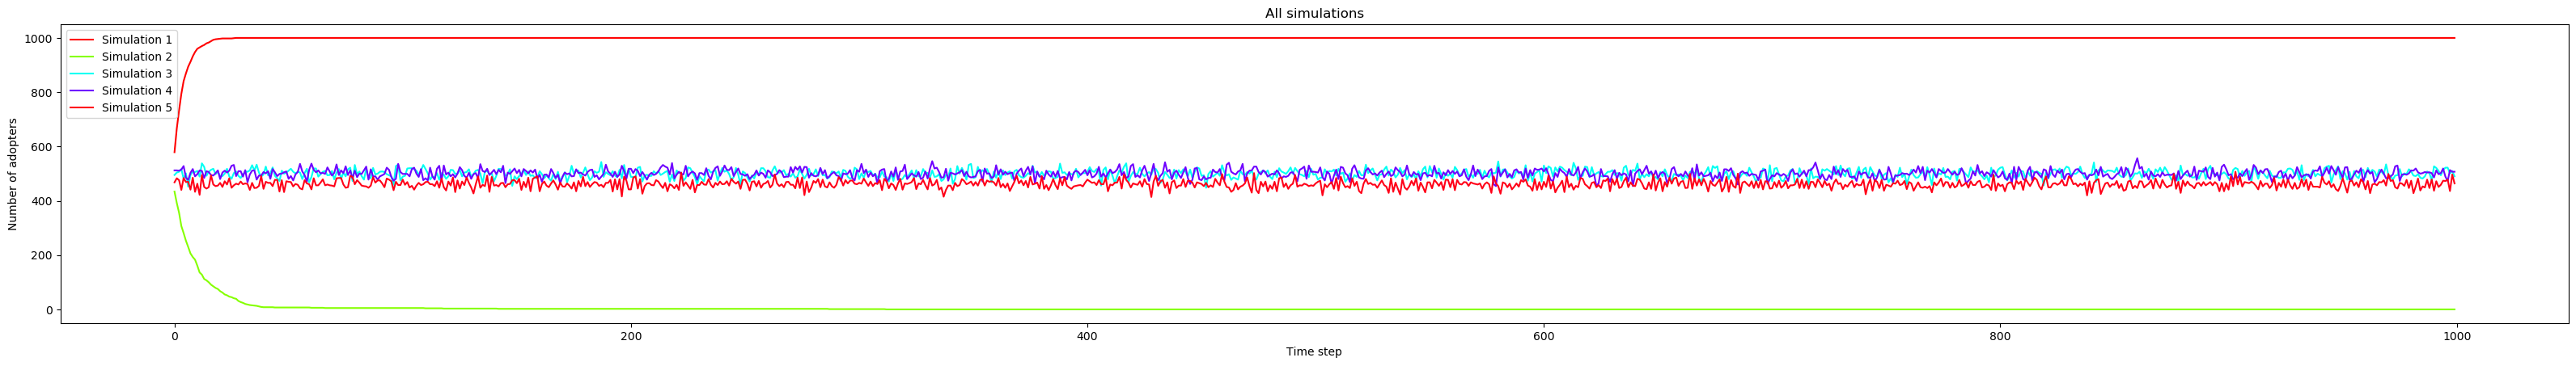

In [111]:
all_simulations = []

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

for i in simulations:
    all_simulations.append(simulation(G, states, influence, i['p_adoption'], i['p_adoption_isolated'], i['p_forgetting'],
                                      i['p_forgetting_isolated'], 'Simulation ' + str(len(all_simulations) + 1)))

cmap = get_cmap(len(all_simulations))

f = plt.figure()
f.set_figwidth(40)

for i in range(len(all_simulations)):
    plt.plot(all_simulations[i], color=cmap(i),
             label='Simulation ' + str(i + 1))

plt.title('All simulations')
plt.xlabel('Time step')
plt.ylabel('Number of adopters')

plt.legend()

plt.show()
